### make_blobs : 등방성(모든 방향으로 같은 성질을 갖는) 가우시안 정규분포를 이용하여 가상 데이터를 생성. 
- n_smaples : 표본 데이터의 수. default = 100
- n_features : 독립 변수의 수. default = 20
- centers : 생성할 클러스터의 수 혹은 중심. 3으로 설정할 경우 군집의 개수를 나타내며, ndarray 형태로 표현할 경우 개별 군집 중심점 좌표를 의미함
- clusters_std : 클러스터의 표준 편차. 0.8로 설정할 경우 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐. [0.8, 1.2, 0.6]과 같은 형태로 만들게 되면 3개의 군집에서 첫번째 군집 내 데이터 편차는 0.8, 두번째 데이터의 표준 편차는 1.2, 세번째 군집 내 데이터 표준편차는 0.6으로 만들어짐. default = 1.0
- center_box : 생성할 클러스터의 바운딩 박스. default = (-10.0, 10.0)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

# y target 값의 분포 확인
unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [4]:
X[:10]

array([[-1.69242695,  3.62202539],
       [ 0.69794036,  4.4288665 ],
       [ 1.10022802,  4.60631734],
       [-1.44872404,  3.38424521],
       [ 1.21486062,  5.36489604],
       [-0.90830163,  1.97077775],
       [ 2.47211942,  0.43703328],
       [ 1.65684156,  2.4412893 ],
       [ 1.07779975,  4.62537882],
       [-1.67942681,  2.60200265]])

In [5]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(10)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
5,-0.908302,1.970778,2
6,2.472119,0.437033,1
7,1.656842,2.441289,1
8,1.077800,4.625379,0
9,-1.679427,2.602003,2


#### make_blob()으로 만들어진 데이터 포인터들을 시각화

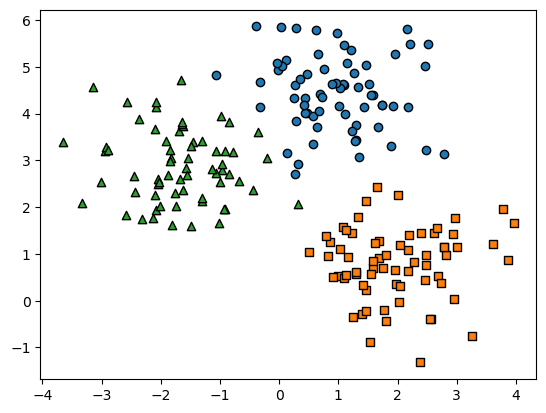

In [7]:
target_list = np.unique(y)

# 각 target별 scatter plot의 marker 값들.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0, 1, 2]
# target == 0, target ==1, target==2 로 scatter plot을 marker별로 생성

for target in target_list :
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])
    
plt.show()

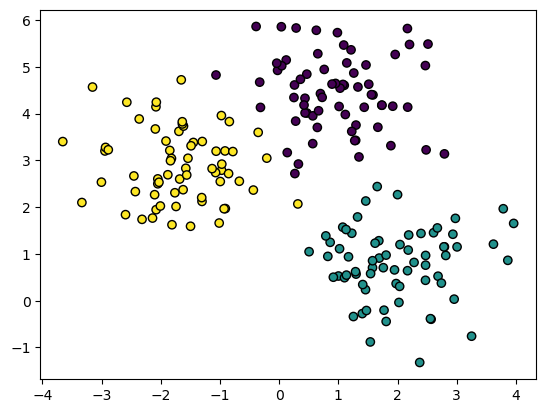

In [8]:
target_list = np.unique(y)
plt.scatter(x = clusterDF['ftr1'], y = clusterDF['ftr2'], edgecolor = 'k', c = y)

#### K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화

In [12]:
from sklearn.cluster import KMeans

# KMeans 객체를 이용하여 x 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

clusterDF

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,2
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,2
198,1.226724,3.620511,0,0


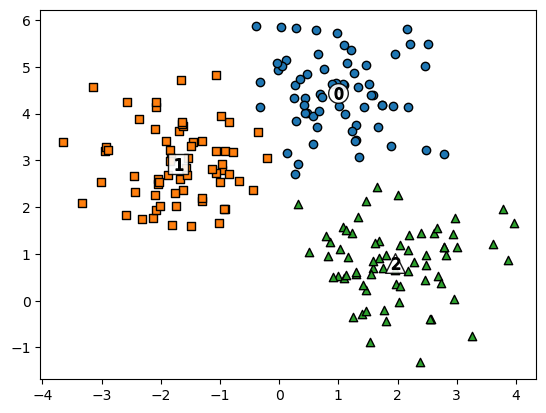

In [14]:
# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집화된 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels :
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    plt.scatter(x = label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor = 'k', marker= markers[label])
    center_x_y = centers[label]
    
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x = center_x_y[0], y= center_x_y[1], s = 200, color = 'white',
                alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k',
                edgecolor = 'k', marker = '$%d$' % label)
    
plt.show()

In [15]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

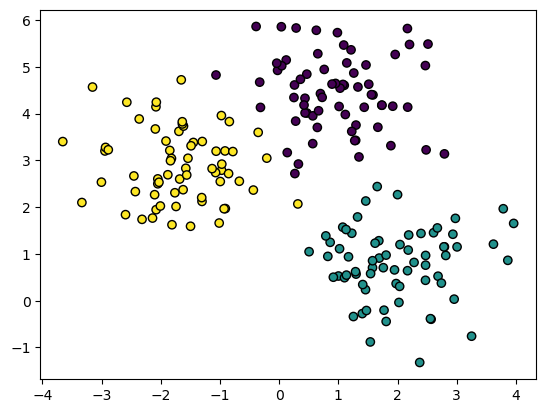

In [16]:
target_list = np.unique(y)
plt.scatter(x = clusterDF['ftr1'], y = clusterDF['ftr2'], edgecolor = 'k', c = y)

In [18]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
